In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('xeek_subset_example.csv')

In [5]:
df.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'LITH'],
      dtype='object')

In [6]:
df = df[['DEPTH_MD','GR']]

In [7]:
df.head()

,DEPTH_MD,GR
0,494.528,80.200851
1,494.680,79.262886
2,494.832,74.821999
3,494.984,72.878922
4,495.136,71.729141


In [25]:
df = df[df['GR']<280]

In [34]:
df = df[df['GR']>10]

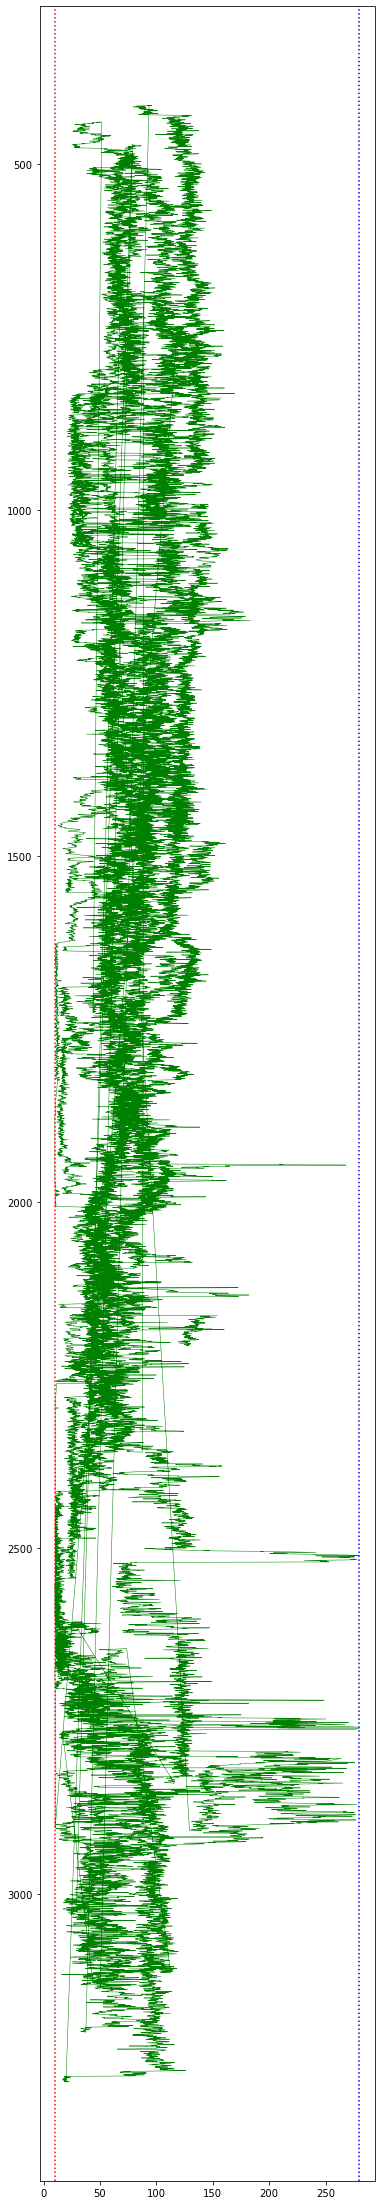

In [35]:
plt.figure(figsize = (6,40))
plt.plot(df.GR, df.DEPTH_MD, linewidth = 0.5, color = 'green')
plt.axvline(df['GR'].min(), color = 'red', linewidth = 1.5, linestyle = 'dotted')
plt.axvline(df['GR'].max(), color = 'blue', linewidth = 1.5, linestyle = 'dotted')

ax = plt.gca()
ax.invert_yaxis()

## GR_shale = 280
## GR_clean = 10

In [36]:
IGR = (df['GR'] - 10)/(280-10)

In [46]:
for i in IGR:
    if i<0:
        i = 0
    elif i>1:
        i = 1

               Vsh_LarionovUn = 0.083*(2^(3.7*IGR)-1),

               Vsh_LarionovC = 0.33*(2^(2*IGR)-1),
               
               Vsh_Stieber = (0.5*IGR)/(1.5-IGR),
               
               Vsh_Clavier = 1.7-(3.38-(IGR+0.7)^2)^0.5

In [62]:
df['Vsh_linear'] = IGR

In [63]:
df['Vsh_LarionovUn'] = 0.083*(2**(3.7*IGR)-1)

In [67]:
df['Vsh_stieber'] = (0.5*IGR)/(1.5-IGR)

In [68]:
df['Vsh_Clavier']= 1.7 - (3.38 - (IGR + 0.7)**2)**0.5


In [70]:
df.drop('stieber',axis=1,inplace=True)

In [83]:
df.sort_values(by=['DEPTH_MD'], inplace=True)

In [88]:
df = df.reset_index()

In [89]:
df

,index,DEPTH_MD,GR,Vsh_linear,Vsh_LarionovUn,Vsh_Clavier,Vsh_stieber
0,78806,415.261599,93.487816,0.309214,0.100436,0.163287,0.129836
1,78807,415.413599,91.850334,0.303149,0.097605,0.159321,0.126645
2,78808,415.565599,92.872391,0.306935,0.099367,0.161792,0.128633
3,78809,415.717599,96.051498,0.318709,0.104958,0.169565,0.134899
4,78810,415.869599,93.369164,0.308775,0.100229,0.162998,0.129604
...,...,...,...,...,...,...,...
126478,18265,3271.416000,19.418915,0.034885,0.007768,0.014787,0.011905
126479,18266,3271.568000,21.444370,0.042387,0.009531,0.018078,0.014540
126480,18267,3271.720000,22.646879,0.046840,0.010594,0.020051,0.016117
126481,18268,3271.872000,22.253584,0.045384,0.010245,0.019404,0.015600


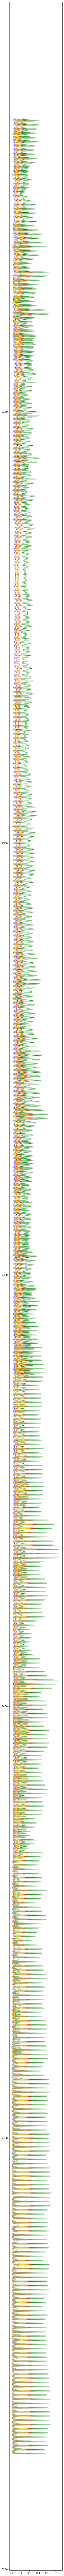

In [91]:
plt.figure(figsize = (4,200))
plt.plot(df.Vsh_linear[90000:100000], df.DEPTH_MD[90000:100000], linewidth = 0.5, color = 'green')

plt.plot(df.Vsh_Clavier[90000:100000], df.DEPTH_MD[90000:100000], linewidth = 0.5, color = 'red')

plt.plot(df.Vsh_LarionovUn[90000:100000], df.DEPTH_MD[90000:100000], linewidth = 0.5, color = 'blue')

plt.plot(df.Vsh_stieber[90000:100000], df.DEPTH_MD[90000:100000], linewidth = 0.5, color = 'yellow')

ax = plt.gca()
ax.invert_yaxis()